# Housing, Health and Happiness: Extension

In the following project, I set out to replicate results presented in the [Housing, Health, and Happiness](https://www.aeaweb.org/articles?id=10.1257/pol.1.1.75) paper published in 2009.

All the data was obtained from [here](https://www.openicpsr.org/openicpsr/project/114542/version/V1/view). This analysis focuses on the results presented in Table 4 of the paper, which are based on the *PisoFirme_AEJPol-20070024_household.dta* data. 

Each household data covers both the 2000 Mexican Census and the 2005 Survey. The features are described in the table below: *'C_xx'* features contain data from the census while *'S_xx'* features are obtained from the survey. 

| Feature name| Interpretation | 
| :- | :- | 
dpisofirme | Treatment Indicator (=1 Torreon; =0 Durango)
idcluster | ID Census Block
coord_x | X-coordinate of census block geographical location
coord_y | Y-coordinate of census block geographical location
idmun | ID Municipality
idmza | ID Block within Census-Block
C_blocksdirtfloor | 2000 Census - Proportion blocks of houses with 1+ houses that has dirt floors
C_HHdirtfloor | 2000 Census - Proportion of households with dirt floors
C_child05 | 2000 Census - Average number of children between 0-5 yrs
C_households | 2000 Census - Number of households
C_people | 2000 Census - Number of people
C_rooms | 2000 Census - Average number of rooms per household
C_HHpersons | 2000 Census - Average number of people per household
C_waterland | 2000 Census - Proportion of households with no water connection outside house
C_waterhouse | 2000 Census - Proportion of households with no water connection inside house
C_waterbath | 2000 Census - Proportion of households with no water connection in bathroom
C_gasheater | 2000 Census - Proportion of households with no gas heater
C_refrigerator | 2000 Census - Proportion of households with no refrigerator
C_washing | 2000 Census - Proportion of households with no washing machine
C_telephone | 2000 Census - Proportion of households with no telephone
C_vehicle | 2000 Census - Proportion of households with no vehicle
C_overcrowding | 2000 Census - Average overcrowding index
C_poverty | 2000 Census - Proportion of households below the poverty line
C_illiterate | 2000 Census - Proportion of households with illiterate members
C_headeduc | 2000 Census - Average years of schooling of head of household
C_dropouts515 | 2000 Census - Average number of school dropouts among children aged 5-15 yrs
C_employment | 2000 Census - Average number of household members who work
C_earnincome | 2000 Census - Average number of family members who earn an income
S_HHpeople | 2005 Survey - Number of household members
S_headage | 2005 Survey - Head of household's age
S_spouseage | 2005 Survey - Spouse's age
S_headeduc | 2005 Survey - Head of household's years of schooling
S_spouseeduc | 2005 Survey - Spouse's years of schooling
S_rooms | 2005 Survey - Number of rooms
S_waterland | 2005 Survey - Water connection (=1)
S_waterhouse | 2005 Survey - Water connection inside the house (=1)
S_electricity | 2005 Survey - Electricity (=1)
S_cementfloor | 2000 2005 Survey - Share of rooms with cement floors in 2000
S_hasanimals | 2005 Survey - Household has animals on land (=1)
S_animalsinside | 2005 Survey - Animals allowed to enter the house (=1)
S_garbage | 2005 Survey - Uses garbage collection service (=1)
S_washhands | 2005 Survey - Number of times respondent washed hands the day before
S_incomepc | 2005 Survey - Total household income per capita
S_assetspc | 2005 Survey - Total value of household assets per capita
S_shpeoplework | 2005 Survey - Proportion of household members who work
S_microenter | 2005 Survey - Household operates a microenterprise (=1)
S_hrsworkedpc | 2005 Survey - Hours worked by household members per capita
S_consumptionpc | 2005 Survey - Total household consumption per capita
S_cashtransfers | 2005 Survey - Transfers per capita from government programs
S_milkprogram | 2005 Survey - Household beneficiary of government milk supplement program (=1)
S_foodprogram | 2005 Survey - Household beneficiary of government food program (=1)
S_dem1 | 2005 Survey - Proportion of Males 0-5yrs in household
S_dem2 | 2005 Survey - Proportion of Males 6-17yrs in household
S_dem3 | 2005 Survey - Proportion of Males 18-49yrs in household
S_dem4 | 2005 Survey - Proportion of Males 50+yrs in household
S_dem5 | 2005 Survey - Proportion of Females 0-5yrs in household
S_dem6 | 2005 Survey - Proportion of Females 6-17yrs in household
S_dem7 | 2005 Survey - Proportion of Females 18-49yrs in household
S_dem8 | 2005 Survey - Proportion of Females 50+yrs in household
S_seguropopular | 2005 Survey - Household beneficiary of seguro popular (=1)
S_shcementfloor | 2005 Survey - Share of rooms with cement floors
S_cementfloorkit | 2005 Survey - Cement floor in kitchen
S_cementfloordin | 2005 Survey - Cement floor in dining room
S_cementfloorbat | 2005 Survey - Cement floor in bathroom
S_cementfloorbed | 2005 Survey - Cement floor in bedroom
S_satisfloor | 2005 Survey - Satisfaction with floor quality
S_satishouse | 2005 Survey - Satisfaction with house quality
S_satislife | 2005 Survey - Satisfaction with quality of life
S_cesds | 2005 Survey - Depression Scale (CES-D Scale)
S_pss | 2005 Survey - Perceived Stress Scale (PSS)
S_instcement | 2005 Survey - Installation of cement floor
S_instsanita | 2005 Survey - Construction/expansion of sanitation facilities
S_restsanita | 2005 Survey - Restoration of sanitation facilities
S_constceili | 2005 Survey - Construction of ceiling
S_restowalls | 2005 Survey - Restoration of walls
S_improveany | 2005 Survey - Any house expansion (excluding installation of cement floors)
S_logrent | 2005 Survey - Log of self-reported rental value of house
S_logsell | 2005 Survey - Log of self-reported sale value of house

In [1]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy import stats
from scipy.optimize import linear_sum_assignment
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

import networkx as nx
from networkx.algorithms.bipartite.matrix import biadjacency_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.subplots import make_subplots
from pylab import *

from random import sample

In [4]:
pio.templates.default = 'ggplot2'

In [5]:
# Load dataset
data = pd.read_stata('data/PisoFirme_AEJPol-20070024_household.dta')
# Drop households whose geographical informations is not complete (NaN)
data = data[data['idcluster'].notna()]
data = data.fillna(0)

In [6]:
data_treatment = data[data['dpisofirme'] == 1]
data_treatment['dummy_cement'] = (data_treatment['S_cementfloor2000'] > data_treatment['S_cementfloor2000'].median()).astype(int)
data_treatment = data_treatment.reset_index()

In [7]:
data_treatment.head()

,index,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,...,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell,dummy_cement
0,1393,1.0,350000066.0,-103.421249,25.56312,35.0,47,0.22,0.019574,0.361459,...,36.0,1.0,0.0,0.0,0.0,1.0,1.0,7.600903,12.611538,1
1,1394,1.0,350000066.0,-103.421249,25.56312,35.0,50,0.22,0.019574,0.361459,...,14.0,1.0,1.0,0.0,0.0,1.0,1.0,5.991465,11.918390,0
2,1395,1.0,350000066.0,-103.421249,25.56312,35.0,25,0.22,0.019574,0.361459,...,27.0,1.0,0.0,0.0,0.0,0.0,0.0,5.991465,11.918390,1
3,1396,1.0,350000066.0,-103.421249,25.56312,35.0,47,0.22,0.019574,0.361459,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6.907755,12.206073,0
4,1397,1.0,350000066.0,-103.421249,25.56312,35.0,49,0.22,0.019574,0.361459,...,18.0,1.0,0.0,0.0,1.0,0.0,1.0,6.214608,11.951180,0


## Linear regression

In [8]:
all_cement = ['S_HHpeople','S_headage','S_spouseage','S_headeduc','S_spouseeduc',
              'S_rooms', 'S_hasanimals','S_animalsinside','S_garbage','S_washhands',
              'S_incomepc','S_assetspc','S_shpeoplework','S_microenter','S_hrsworkedpc',
              'S_consumptionpc','S_milkprogram','S_dem2','S_dem3','S_dem4','S_dem5','S_dem6','S_dem7','S_dem8']

In [9]:
significiant_cement_variables = []
for i in all_cement:
    # Regress dependent variale i on variable(s) var
    ols = smf.ols('dummy_cement ~' + i, data=data_treatment).fit()
    if ols.pvalues[i] < 0.05:
        significiant_cement_variables.append(i)

In [10]:
ols = sm.OLS(data_treatment['dummy_cement'],data_treatment[significiant_cement_variables]).fit()

In [11]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           dummy_cement   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              282.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                   5.00e-207
Time:                        11:45:41   Log-Likelihood:                         -958.05
No. Observations:                1362   AIC:                                      1926.
Df Residuals:                    1357   BIC:                                      1952.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
S_headeduc       0.0108      0.004      2.671      0.008       0.003       0.019
S_spouseeduc     0.0155      0.004      3.750      0.000       0.007       0.024
S_rooms          0.1069      0.010     10.362      0.000       0.087       0.127
S_hasanimals    -0.0389      0.026     -1.508      0.132      -0.090       0.012
S_washhands      0.0328      0.007      4.420      0.000       0.018       0.047
==============================================================================
Omnibus:                     6458.270   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.861
Skew:                           0.052   Prob(JB):                     4.32e-36
Kurtosis:                       1.309   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
selected_ols = list(ols.pvalues[np.where(ols.pvalues < 0.05)[0]].index)

In [13]:
selected_ols

['S_headeduc', 'S_spouseeduc', 'S_rooms', 'S_washhands']

## Propensity computation

In [14]:
def create_full_graph(d_cemented, df_uncemented, score, eps = 0.05): 
    """This function returns a bipartite graph where all nodes from the treated group are connected 
    to all nodes from the untreated group iif edges weight is < eps 
    arguments:
        d_treated: dictionnary of treatment group where keys = name of paper and values = propensity score of paper
        df_untreated: dataframe where col1 contains name of untreated papers and col2 containes propensity scores
    return: The weighted graph and a list of matched treated units
    """
    G = nx.DiGraph()
    top = []
    count = 0
    not_matched = []
    for cemented_id, cemented_prop in d_cemented.items():
        #get mask for all untreated units that are close enough to the treated unit 'treated_id'
        mask_close_enough = np.abs(cemented_prop-df_uncemented[score].values) < eps
        names_close_enough = df_uncemented.loc[mask_close_enough,'index'].tolist()
        weight_close_enough = np.abs(cemented_prop - df_uncemented.loc[mask_close_enough,score]).tolist()
        if not weight_close_enough: 
            count += 1
            not_matched.append(cemented_id)
        else:
            for i in range(len(names_close_enough)):
                #connect the treated unit to all untreated units that meet minimum criteria eps
                G.add_edge(cemented_id, names_close_enough[i], weight = weight_close_enough[i])
            top.append(cemented_id)
    print('{} cemented households could not be matched'.format(count))
    return G, top, not_matched

In [15]:
def min_weight_match(G, top_nodes):
    """This function computes a minimum weight matching in bipartite graphs such that a maximum number of units 
    from the treated group are matched to units in the untreated group in a way that minimizes the sum of total weights. 
    Units that cannot be matched are ignored. 
    arguments: 
    G: bipartite graph with weighted edges
    top_nodes: list of nodes from one of the bipartite set
    return: A list of tuples such that each tuple represents a match: (id of treated units,id of untreated units)
    """
    #infer sets of nodes from the graph
    left, right = nx.bipartite.sets(G, top_nodes)
    U = list(left)
    V = list(right)
  
    #Create sparse biadjency matrix where rows are the treated units and the columns are the untreated units. 
    #Values are the similarity of the propensity scores
    weights_sparse = biadjacency_matrix(G, row_order=U, column_order=V, weight='weight', format="coo")
    
    # Missing edges between two units are represented as having an infinity distance between them
    weights = np.full(weights_sparse.shape, 10000000000)
    weights[weights_sparse.row, weights_sparse.col] = weights_sparse.data
    
    #computes the linear optimization on the similarity matrix and returns two lists of indices 
    #where element1 of list1 is matched to element1 of list2
    treat, untreat = linear_sum_assignment(weights)
    #cost represents the sum of all dissimilarity scores
    cost = weights[treat, untreat].sum()
    #create dictionnary with names of units (rather than indices)
    l = [(U[u], V[v]) for u, v in zip(treat, untreat)]

    return l, cost 

In [16]:
SEED = 1234

In [17]:
df_main = data_treatment[selected_ols + ['dummy_cement']].reset_index(drop = True)
X, y = df_main.iloc[:,:-1], df_main.iloc[:,-1]

In [18]:
X.describe()

,S_headeduc,S_spouseeduc,S_rooms,S_washhands
count,1362.000000,1362.000000,1362.000000,1362.000000
mean,6.119310,5.616373,2.080029,3.754038
std,3.450379,3.482169,1.103157,1.465900
min,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,1.000000,3.000000
50%,6.000000,6.000000,2.000000,3.000000
75%,9.000000,9.000000,3.000000,4.000000
max,16.000000,16.000000,10.000000,10.000000


In [19]:
models_name =  {'RandomForest': RandomForestClassifier(criterion='gini', random_state = SEED,  bootstrap=True),'DecisionTree': DecisionTreeClassifier(random_state = SEED), 'GradientBoost': GradientBoostingClassifier(random_state = SEED)}
scores = pd.DataFrame(columns = models_name.keys())
for n, m in models_name.items():
    model = m
    model.fit(X,y)
    scores[n] = model.predict_proba(X)[:,1]

In [20]:
prop_data = df_main[['dummy_cement']].merge(scores, left_index = True, right_index = True)
prop_data.reset_index(inplace = True)
prop_data.head()

,index,dummy_cement,RandomForest,DecisionTree,GradientBoost
0,0,1,0.940714,1.0,0.716625
1,1,0,0.260000,0.0,0.635447
2,2,1,0.738595,1.0,0.395357
3,3,0,0.522333,0.5,0.492673
4,4,0,0.259167,0.0,0.540145


In [21]:
print('There are {} households that had more than the median share of cement before PisoFirme, and {} that did not.'.format(prop_data.dummy_cement.value_counts()[1], prop_data.dummy_cement.value_counts()[0]))

There are 664 households that had more than the median share of cement before PisoFirme, and 698 that did not.


In [46]:
def plot_distribution(data): 
    prop_data_sort = data.copy()

    prop_data_sort["dummy_cement"].replace([0,1], ['Under mean', 'Over mean'], inplace = True)
    models = list(prop_data_sort.columns[2:])
    
    fig = make_subplots(rows=1, cols=3, subplot_titles = ['Random Forest classifier', 'Decision Tree classifier', 'Gradient Boost classifier' ])
    i = 0
    legend = True
    for j in models: 
        if i > 0: legend = False
  
        prop_data_sort = prop_data_sort.sort_values(by = [j, 'index'])
        prop_data_sort.reset_index(drop = True, inplace = True)
        cemented = prop_data_sort[prop_data_sort.dummy_cement == 'Over mean']
        uncemented = prop_data_sort[prop_data_sort.dummy_cement == 'Under mean']
        
        fig.add_trace(go.Scatter(x = list(cemented.index), y = cemented[j],opacity = 0.65, 
                                 mode = 'markers', name = 'Over mean',
                                 marker=dict(size=6, color= '#fde725'),
                      showlegend=legend), row =1, col = i+1)
        
        fig.add_trace(go.Scatter(x = list(uncemented.index), y = uncemented[j],opacity =0.65, 
                                 mode = 'markers', name = 'Under mean',
                                 marker=dict(size=6, color= '#440154'), 
                      showlegend=legend), row =1, col = i+1)
        i += 1
        
        fig.update_traces( hovertemplate=  "Household index: %{x:,.0f}<br>" +"Propensity score: %{y:.2f}<br>" +"<extra></extra>")
        fig.update_xaxes(title_text="Household index")
        fig.update_yaxes(title_text="Propensity score")
    
    fig.update_layout(autosize=False, width=1200, height=500,margin=dict(l=65, r=65, b=65, t=130),title_text="<b>Cement share propensity distribution<b>", showlegend = True)
    fig.show()
    fig.write_html('figures/cement_classifier_all.html')

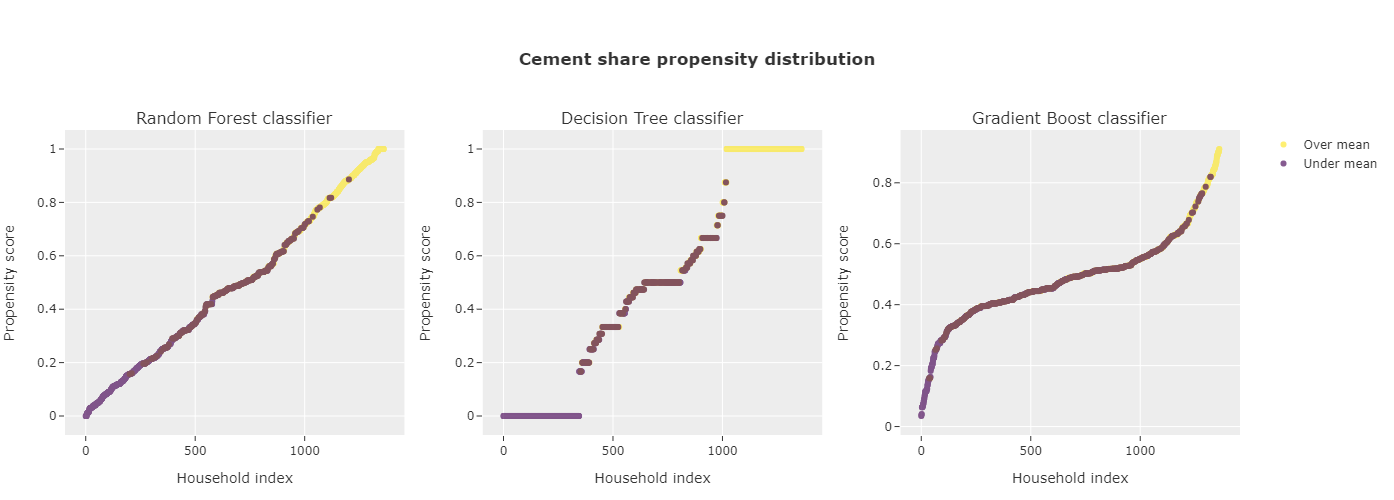

In [47]:
plot_distribution(prop_data)

In [24]:
all_matchings = {}
all_unmatched = []

for j in models_name.keys(): 
    cemented = dict(prop_data.loc[prop_data.dummy_cement == 1, ['index',j]].values)
    uncemented = prop_data.loc[prop_data.dummy_cement == 0, ['index', j]]
    
    complete_graph, matched_households, not_matched = create_full_graph(cemented, uncemented, score = j)
    l_matching, _ = min_weight_match(complete_graph, top_nodes = matched_households)
    all_unmatched += not_matched
    all_matchings[j] = dict(l_matching)

98 cemented households could not be matched
343 cemented households could not be matched
13 cemented households could not be matched


In [26]:
df_sample = df_main.copy()

In [27]:
df_sample.reset_index(inplace = True)
df_sample.head()

,index,S_headeduc,S_spouseeduc,S_rooms,S_washhands,dummy_cement
0,0,0.0,0.0,4,3.0,1
1,1,9.0,6.0,4,4.0,0
2,2,5.0,0.0,1,3.0,1
3,3,12.0,12.0,1,4.0,0
4,4,9.0,0.0,4,3.0,0


In [28]:
matched_R = all_matchings['RandomForest'].copy()
matched_D = all_matchings['DecisionTree'].copy()
matched_G = all_matchings['GradientBoost'].copy()

In [29]:
common_keys = set.intersection(set(matched_R.keys()), set(matched_D.keys()), set(matched_G.keys()))     
sample_keys = sample(common_keys, 4)

In [30]:
cmap = cm.get_cmap('icefire', 10)    # PiYG
colors_ls = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors_ls.append(matplotlib.colors.rgb2hex(rgba))

In [31]:
for i, idx in enumerate(sample_keys):
    col = colors_ls[i]
    matched_id_R = matched_R[idx]
    matched_id_G = matched_G[idx]
    matched_id_D = matched_D[idx]
    
    df_sample.loc[idx,'type'] = 'Interest'
    df_sample.loc[idx,'color'] = col
    
    df_sample.loc[matched_id_R,'color'] = col
    df_sample.loc[matched_id_D,'color'] = col
    df_sample.loc[matched_id_G,'color'] = col
    df_sample.loc[matched_id_R,'type'] = 'RandomForest'
    df_sample.loc[matched_id_D,'type'] = 'DecisionTree'
    df_sample.loc[matched_id_G,'type'] = 'GradientBoost'

df_sample = df_sample[df_sample.type.notna()]

In [61]:
fig = px.scatter_3d(df_sample,x = 'S_rooms', y = 'S_spouseeduc', z = 'S_washhands', opacity = 0.7, symbol = 'type',
                        color='color', title = 'Matches obtained with different classifiers ',
                    labels = {'S_washhands': 'Frequency of<br>hands washing', 'S_rooms': 'Number of<br>rooms', 'S_spouseeduc': 'Spouse years<br>of education', 'color':'', 'type':'', 
                             '#6bb2cd, Interest': 'Interest', '#6bb2cd, GradientBoost': 'GradientBoost'}, hover_name = 'type')

symbols = {'Interest': 'x','RandomForest':'circle-open','DecisionTree':'diamond-open','GradientBoost': 'square-open'}

# set all symbols in fig
for i, d in enumerate(fig.data):
    fig.data[i].marker.symbol = symbols[fig.data[i].name]

fig.update_traces(marker=dict(size=12), showlegend = True, hovertemplate=  "Numb. rooms: %{x:,.0f}<br>" +"Spouse years of educ: %{y:.0}<br>" +"Freq. hands washing: %{z:.0}<br>" +"<extra></extra>")
fig.update_layout(autosize=False, width=1000, height=700,margin=dict(l=65, r=65, b=65, t=90))
fig.show()

In [ ]:
def visualize_matching(df, institution = 'all', features = ['ratings', 'reputation']):
    """ Creates distribution plots with kernel smoothing for all features, as well as bivariate distribution """
    #create visualization for distribution of matched and all papers
    f, axes = plt.subplots(5,2, figsize = (15,9))

    plt.suptitle('Visualization of distribution by Arxiv pre-print for {} institutions'.format(institution), y =0.95)
    
    for i in range(len(features)):
        f1 = features[i]
        sns.histplot(df, ax = axes[i,0],  x=f1, hue='dummy_cement', element="step", kde = True, 
                 bins = np.arange(df[f1].min(),df[f1].max(),0.5))
        sns.histplot(df[df.matched == True], ax = axes[i,1],  x=f1, hue='dummy_cement', element="step", kde = True,
                 bins = np.arange(df[f1].min(),df[f1].max(),0.5))

    sns.kdeplot(x=df.loc[df.matched == True,features[0]], y = df.loc[df.matched == True, features[1]], hue=df[df.matched == True].dummy_cement, ax = axes[2,1])
    sns.kdeplot(x=df[features[0]], y = df[features[1]], hue=df.dummy_cement, ax = axes[2,0])

    plt.subplots_adjust(hspace = 0.5)
    plt.show()

In [ ]:
#flatten list of pairs of matched papers
matched = list(sum(l_matching, ()))

#create variable to specify if paper was matched (easier to filter later)
matched_mask = data_treatment['index'].isin(matched)
data_treatment.loc[matched_mask,'matched'] = True
data_treatment.loc[~matched_mask,'matched'] = False

In [ ]:
visualize_matching(data_treatment, features=['S_satisfloor', 'S_satishouse', 'S_satislife', 'S_cesds', 'S_pss'])